In [33]:
%matplotlib inline
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | aksarka
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | nyurba
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | guaratinga
Processing Record 9 of Set 1 | guiyang
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | saint-augustin
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | havoysund
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | kobojango
City not found. Skipping...
Processing Record 22 of Set 1 | isangel
Proce

Processing Record 37 of Set 4 | guadalajara
Processing Record 38 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | yen bai
Processing Record 41 of Set 4 | bandarbeyla
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 4 | katherine
Processing Record 47 of Set 4 | saskylakh
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | sinnamary
Processing Record 2 of Set 5 | yar-sale
Processing Record 3 of Set 5 | bonoua
Processing Record 4 of Set 5 | harper
Processing Record 5 of Set 5 | muisne
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | conceicao do araguaia
Proces

Processing Record 23 of Set 8 | theunissen
Processing Record 24 of Set 8 | abbeville
Processing Record 25 of Set 8 | nuuk
Processing Record 26 of Set 8 | kuna
Processing Record 27 of Set 8 | tabialan
City not found. Skipping...
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | kampene
Processing Record 30 of Set 8 | chahal
Processing Record 31 of Set 8 | mokhotlong
Processing Record 32 of Set 8 | samusu
City not found. Skipping...
Processing Record 33 of Set 8 | madera
Processing Record 34 of Set 8 | pervomayskiy
Processing Record 35 of Set 8 | conakry
Processing Record 36 of Set 8 | igarka
Processing Record 37 of Set 8 | bardiyah
Processing Record 38 of Set 8 | ostrovnoy
Processing Record 39 of Set 8 | chepareria
Processing Record 40 of Set 8 | port macquarie
Processing Record 41 of Set 8 | aykhal
Processing Record 42 of Set 8 | concordia
Processing Record 43 of Set 8 | minbu
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | labutta
City n

Processing Record 10 of Set 12 | konibodom
Processing Record 11 of Set 12 | najran
Processing Record 12 of Set 12 | logan lake
Processing Record 13 of Set 12 | saint anthony
Processing Record 14 of Set 12 | mirebalais
Processing Record 15 of Set 12 | talcahuano
Processing Record 16 of Set 12 | yinchuan
Processing Record 17 of Set 12 | luanda
Processing Record 18 of Set 12 | korla
Processing Record 19 of Set 12 | neiafu
Processing Record 20 of Set 12 | mahibadhoo
Processing Record 21 of Set 12 | sola
Processing Record 22 of Set 12 | qui nhon
Processing Record 23 of Set 12 | tadine
Processing Record 24 of Set 12 | sept-iles
Processing Record 25 of Set 12 | borujan
City not found. Skipping...
Processing Record 26 of Set 12 | cabedelo
Processing Record 27 of Set 12 | babanusah
City not found. Skipping...
Processing Record 28 of Set 12 | nikolayevsk-na-amure
Processing Record 29 of Set 12 | andenes
Processing Record 30 of Set 12 | vemalwada
Processing Record 31 of Set 12 | qaqortoq
Processi

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)[["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2021-10-22 22:36:11,-20.3428,57.7575,73.22,100,75,3.44
1,Aksarka,RU,2021-10-22 22:36:12,66.5606,67.7975,26.71,96,96,6.89
2,Pangnirtung,CA,2021-10-22 22:36:12,66.1451,-65.7125,26.60,80,75,11.50
3,Ushuaia,AR,2021-10-22 22:36:13,-54.8000,-68.3000,51.46,43,20,12.66
4,Talnakh,RU,2021-10-22 22:36:13,69.4865,88.3972,23.56,96,100,4.99
5,Nyurba,RU,2021-10-22 22:36:14,63.2842,118.3319,32.20,91,92,8.95
6,Saint-Philippe,RE,2021-10-22 22:36:14,-21.3585,55.7679,72.99,81,11,8.97
7,Guaratinga,BR,2021-10-22 22:36:15,-16.5667,-39.5667,74.07,93,99,5.44
8,Guiyang,CN,2021-10-22 22:36:15,26.5833,106.7167,45.09,81,20,4.47
9,Yellowknife,CA,2021-10-22 22:36:09,62.4560,-114.3525,45.41,65,40,27.63


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

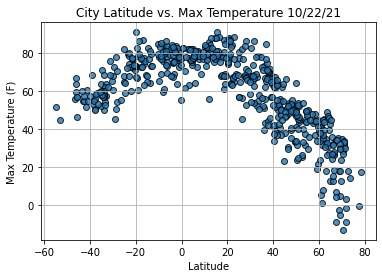

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

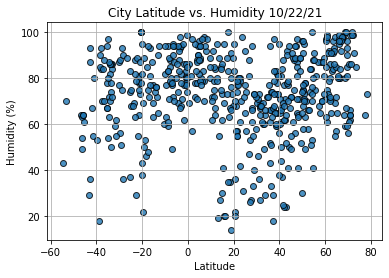

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

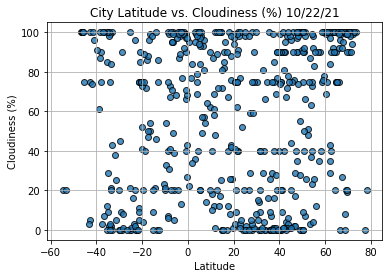

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

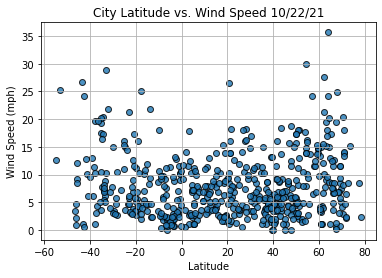

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [76]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

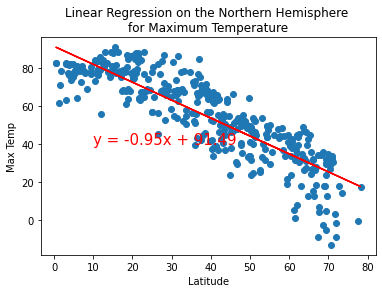

In [77]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere " + "\n" + 
                       "for Maximum Temperature", 'Max Temp',(10,40))

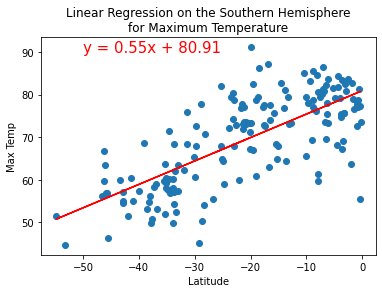

In [78]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere" + "\n" + 
                       "for Maximum Temperature", 'Max Temp',(-50,90))

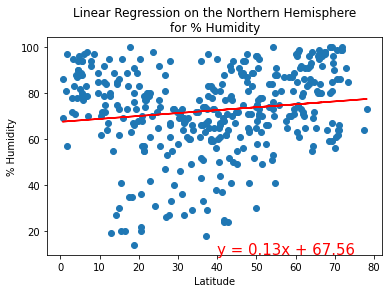

In [81]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere" + "\n" + 
                        "for % Humidity", '% Humidity',(40,10))

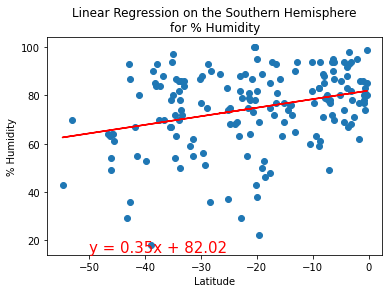

In [82]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere" + "\n" +
                        "for % Humidity", '% Humidity',(-50,15))

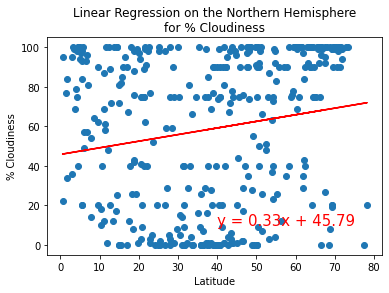

In [83]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere" + "\n" +
                       "for % Cloudiness", '% Cloudiness',(40,10))

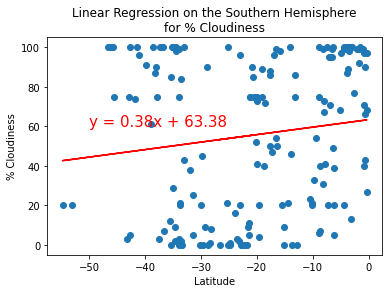

In [84]:
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere" + "\n" +
                       "for % Cloudiness", '% Cloudiness',(-50,60))

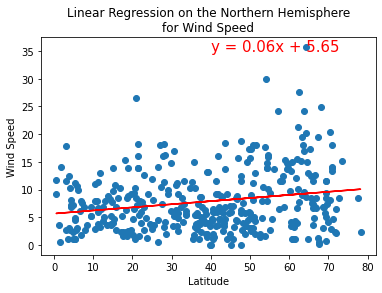

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere" + "\n" +
                       "for Wind Speed", 'Wind Speed',(40,35))

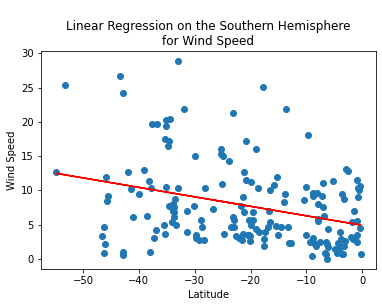

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere" + "\n" +
                       "for Wind Speed", 'Wind Speed',(-50,35))